<a href="https://colab.research.google.com/github/Enjelinaummi/python_for_datascience/blob/main/Tugas_5_(Angelinuami_Khusnul_Khotimah).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tugas 5

Silahkan cari dataset pada open data (Kaggle/bps/dsb) dengan format csv/txt kemudian buat project pada google colab dan lakukan
*   Load dataset hasil download
*   Penerapan functional programming (lambda, recursion, first class)
*   Penerapan numpy (statistic, join, splitting, matriks)
*   Penerapan pandas (filter, replace, group)
*   Penerapan visualization (matplotlib, seaborn)










In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Load dataset
dataset= '/content/drive/MyDrive/Colab Notebooks/Tugas 5/sunscreen_data.csv'
df = pd.read_csv(dataset)

# Lihat 5 baris pertama dari dataset
df.head(20)

# Lihat 5 baris pertama dari dataset
# df.tail()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Type,Name,Brand,Rating,Total Reviewers,Link
0,Sunscreen,Sun Protection SPF 30 PA+++,Emina,3.6,"13,700",https://reviews.femaledaily.com/products/moist...
1,Sunscreen,Hydrasoothe Sunscreen Gel SPF 45+++,Azarine Cosmetics,4.1,"9,441",https://reviews.femaledaily.com/products/moist...
2,Sunscreen,UV Moisture Milk,Skin Aqua,4.2,"8,947",https://reviews.femaledaily.com/products/moist...
3,Sunscreen,UV Shield Essential Sunscreen Gel SPF 35 PA +++,Wardah,3.3,"8,358",https://reviews.femaledaily.com/products/moist...
4,Sunscreen,UV Aqua Rich Watery Essence SPF 50+/PA++++,Biore,4.2,"7,362",https://reviews.femaledaily.com/products/moist...
5,Sunscreen,UV Moisture Gel,Skin Aqua,4.0,"3,477",https://reviews.femaledaily.com/products/moist...
6,Sunscreen,UV Perfect Matte & Fresh Long UV SPF 50/ PA++++,L'Oreal Paris,3.7,"3,411",https://reviews.femaledaily.com/products/moist...
7,Sunscreen,Cica Beat The Sun,NPURE,4.1,"3,366",https://reviews.femaledaily.com/products/moist...
8,Sunscreen,Sun Protect & White Oil Control Serum SPF 50+,NIVEA,3.9,"1,550",https://reviews.femaledaily.com/products/moist...
9,Sunscreen,UV Defender Bright & Clear,L'Oreal Paris,3.9,"1,314",https://reviews.femaledaily.com/products/moist...


#Penerapan functional programming (Lambda, Recursion, First Class)

##Lamda

In [ ]:
# Menambahkan kolom baru yang menghitung nilai rating dalam format float
sunscreen_data['Rating'] = sunscreen_data['Rating'].astype(float)

# Menggunakan lambda untuk membuat kolom baru yang menunjukkan apakah rating di atas 4
sunscreen_data['Above_Average'] = sunscreen_data['Rating'].apply(lambda x: x > 4)

# Tampilkan data
sunscreen_data[['Name', 'Rating', 'Above_Average']].head()


,Name,Rating,Above_Average
0,Sun Protection SPF 30 PA+++,3.6,False
1,Hydrasoothe Sunscreen Gel SPF 45+++,4.1,True
2,UV Moisture Milk,4.2,True
3,UV Shield Essential Sunscreen Gel SPF 35 PA +++,3.3,False
4,UV Aqua Rich Watery Essence SPF 50+/PA++++,4.2,True


##Recursion

In [ ]:
def sum_reviewers(reviewer_list):
    # Jika daftar kosong, kembalikan 0
    if not reviewer_list:
        return 0
    # Jika hanya ada satu elemen, kembalikan elemen tersebut
    elif len(reviewer_list) == 1:
        return reviewer_list[0]
    else:
        # Pecah daftar menjadi dua bagian dan jumlahkan hasil rekursi
        mid = len(reviewer_list) // 2
        return sum_reviewers(reviewer_list[:mid]) + sum_reviewers(reviewer_list[mid:])

# Menghitung total reviewer
total_reviewers = sum_reviewers(sunscreen_data['Total Reviewers'].str.replace(',', '').astype(int).tolist())
total_reviewers


598891

##First-Class Function

In [ ]:
# Penggunaan first-class function
def print_top_rated_sunscreens(data):
    top_rated = data[data['Rating'] >= 4.0]
    return top_rated

top_sunscreens = print_top_rated_sunscreens(df)
print(top_sunscreens)

                 Type                                        Name  \
1           Sunscreen         Hydrasoothe Sunscreen Gel SPF 45+++   
2           Sunscreen                            UV Moisture Milk   
4           Sunscreen  UV Aqua Rich Watery Essence SPF 50+/PA++++   
5           Sunscreen                             UV Moisture Gel   
7           Sunscreen                           Cica Beat The Sun   
...               ...                                         ...   
7427  Make Up Removal  Blueberry Micellar 5.5 Lip&Eye Remover Pad   
7428  Make Up Removal              Waterproof Eye Make-Up Remover   
7429  Make Up Removal        Come Clean Eye & Lip Make-up Remover   
7430  Make Up Removal                           Point Make Up Off   
7431  Make Up Removal  The Style Green Tea Lip&Eye Makeup Remover   

                  Brand  Rating Total Reviewers  \
1     Azarine Cosmetics     4.1           9,441   
2             Skin Aqua     4.2           8,947   
4                 

#Penerapan Numpy (Statistic, Join, Splitting, Matriks)

##Statistic

In [ ]:
import numpy as np

ratings = sunscreen_data['Rating'].to_numpy()

# Menghitung statistik
mean_rating = np.mean(ratings)
median_rating = np.median(ratings)
std_dev_rating = np.std(ratings)

# Tampilkan statistik
print(f"Mean Rating: {mean_rating:.2f}, Median Rating: {median_rating:.2f}, Standard Deviation: {std_dev_rating:.2f}")


Mean Rating: 4.19, Median Rating: 4.20, Standard Deviation: 0.67


##Join

In [ ]:
# Join dua arrays (misalnya rating dan total reviewer)
ratings = np.array(df['Rating'])
reviewers = np.array(df['Total Reviewers'])
combined = np.column_stack((ratings, reviewers))
print(combined)

[[3.6 '13,700']
 [4.1 '9,441']
 [4.2 '8,947']
 ...
 [4.0 '1']
 [5.0 '1']
 [5.0 '1']]


##Splitting

In [ ]:
# Membagi rating menjadi dua kategori
below_4, above_4 = np.split(ratings, [np.searchsorted(ratings, 4)])

(below_4, above_4)  # Mengembalikan kedua array

(array([3.6, 4.1, 4.2, 3.3, 4.2, 4. , 3.7, 4.1, 3.9, 3.9, 3.7, 3.7, 3.9,
        4.3, 4. , 4.1, 4.3, 4. , 4. , 3.7, 3.4, 4.1, 4.3, 4.4, 4.6, 4.1,
        4. , 4. , 3.9, 3.4, 3.9, 3.7, 3.6, 4. , 4.1, 3.9, 4.2, 3.5, 3.9,
        4.3, 4. , 4.4, 4.5, 4.1, 4.9, 4.3, 3.7, 4. , 4.1, 4.4, 4.5, 3.7,
        3.5, 3.9, 4.2, 3.9, 3.4, 3.9, 3.9, 4. , 3.7, 4. , 4.1, 3.5, 3.9,
        3.4, 3.1, 4.2, 4.3, 3.4, 3.7, 4.5, 4.4, 4.6, 4.3, 4.6, 3.8, 4.2,
        3.4, 4.7, 4.8, 4.3, 4.1, 3.6, 3.8, 4. , 4.1, 4.3, 4.1, 3.8, 4.8,
        4.4, 3.6, 4.7, 4.6, 3.3, 4. , 4.2, 4.1, 3.1, 4. , 4.5, 3.9, 3.7,
        3.6, 4.4, 4.3, 4.7, 3.6, 3.3, 3.8, 4.3, 4. , 3.1, 4. , 4. , 4. ,
        3.9, 4. , 4.5, 4.2, 4.2, 3.2, 4. , 5. , 3.8, 3.2, 4.1, 4.6, 4.2,
        4.4, 3.7, 4.5, 4.5, 4. , 4. , 3.7, 4. , 4.3, 4. , 4.2, 4.4, 4.4,
        4.2, 3.4, 3.5, 3.8, 5. , 4.2, 4.4, 4.3, 4.9, 4.7, 4.1, 3.4, 3.9,
        4.3, 4.4, 4. , 4.6, 3.4, 4.5, 4.4, 4.2, 4.1, 4.2, 3. , 4.1, 3.6,
        2.2, 3.6, 3.2, 4.1, 4.7, 5. , 4.6, 3.2, 4.2

##Matriks

In [ ]:
# Mengambil kolom 'Total Reviewers' dan mengubahnya menjadi float
total_reviewers = sunscreen_data['Total Reviewers'].str.replace(',', '').astype(float)

# Membuat matriks dari rating dan total reviewer
data_matrix = np.column_stack((ratings, total_reviewers))

data_matrix

array([[3.600e+00, 1.370e+04],
       [4.100e+00, 9.441e+03],
       [4.200e+00, 8.947e+03],
       ...,
       [4.000e+00, 1.000e+00],
       [5.000e+00, 1.000e+00],
       [5.000e+00, 1.000e+00]])

#Penerapan pandas (Filter, Replace, Group)

##Filter

In [ ]:
# Filter produk dengan rating di atas 4
filtered_data = sunscreen_data[sunscreen_data['Rating'] > 4]

# Tampilkan 20 data set pertama yang telah difilter
filtered_data[['Name', 'Rating']].head(10)


,Name,Rating
1,Hydrasoothe Sunscreen Gel SPF 45+++,4.1
2,UV Moisture Milk,4.2
4,UV Aqua Rich Watery Essence SPF 50+/PA++++,4.2
7,Cica Beat The Sun,4.1
13,UV Whitening Milk,4.3
15,Aloe Soothing Sun Cream,4.1
16,Light Complete Super UV Spot Proof Watery Suns...,4.3
21,Tone Up UV Essence SPF50+ PA++++,4.1
22,UV Defender Invisible Fluid Sunscreen SPF50+ P...,4.3
23,Intensive UV Sunblock Cream,4.4


##Replace

In [ ]:
# Mengganti merek yang ratingnya di bawah 4 dengan 'Not Recommended'
sunscreen_data['Brand'] = sunscreen_data['Brand'].where(sunscreen_data['Rating'] >= 4, 'Not Recommended')

# Tampilkan beberapa data dari dataset yang telah dimodifikasi
sunscreen_data[['Name', 'Brand', 'Rating']].head(20)



,Name,Brand,Rating
0,Sun Protection SPF 30 PA+++,Not Recommended,3.6
1,Hydrasoothe Sunscreen Gel SPF 45+++,Azarine Cosmetics,4.1
2,UV Moisture Milk,Skin Aqua,4.2
3,UV Shield Essential Sunscreen Gel SPF 35 PA +++,Not Recommended,3.3
4,UV Aqua Rich Watery Essence SPF 50+/PA++++,Biore,4.2
5,UV Moisture Gel,Skin Aqua,4.0
6,UV Perfect Matte & Fresh Long UV SPF 50/ PA++++,Not Recommended,3.7
7,Cica Beat The Sun,NPURE,4.1
8,Sun Protect & White Oil Control Serum SPF 50+,Not Recommended,3.9
9,UV Defender Bright & Clear,Not Recommended,3.9


##Group

In [ ]:
# Menghitung rata-rata rating per merek
grouped_data = sunscreen_data.groupby('Brand')['Rating'].mean().reset_index()

# Tampilkan hasil rata-rata rating per merek
grouped_data



,Brand,Rating
0,100% Pure,4.000000
1,107 ONEOSEVEN,4.300000
2,23 Years Old,4.220000
3,27Degrees.id,4.300000
4,2SOL Cosmetic,4.000000
...,...,...
1098,pHisohex,4.200000
1099,primera,4.500000
1100,the Aubree,4.366667
1101,the Juicy Gal,4.900000


# Penerapan visualization (matplotlib, seaborn)

##Matplotlib

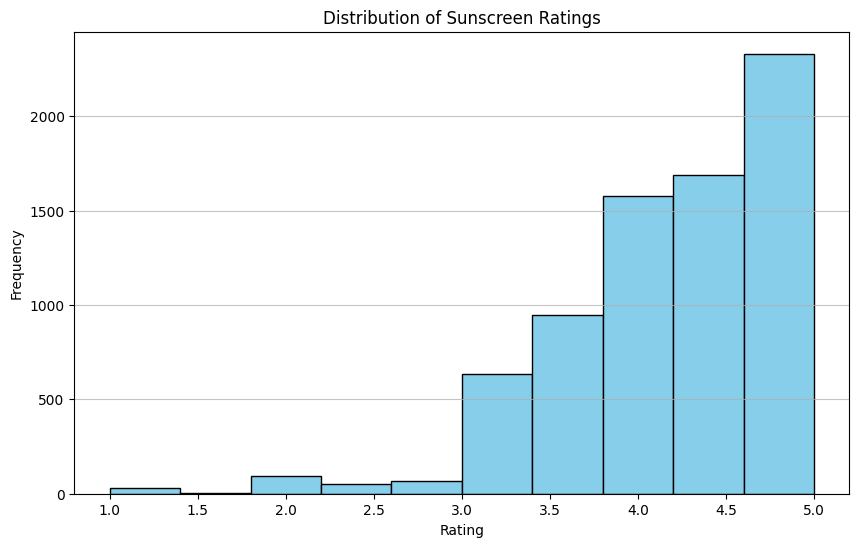

In [ ]:
import matplotlib.pyplot as plt


#Histogram Rating Sunscreen
#Visualisasi distribusi rating sunscreen
plt.figure(figsize=(10, 6))
plt.hist(df['Rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Sunscreen Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()




In [ ]:
# Cek tipe data dan nilai unik di kolom 'Total Reviewers'
print(df['Total Reviewers'].dtype)
print(df['Total Reviewers'].unique())

# Mengonversi kolom 'Total Reviewers' menjadi numerik, dengan mengabaikan kesalahan
df['Total Reviewers'] = pd.to_numeric(df['Total Reviewers'], errors='coerce')

float64
[      nan 9.530e+02 9.460e+02 9.420e+02 8.020e+02 7.860e+02 6.590e+02
 6.360e+02 6.000e+02 5.480e+02 4.950e+02 4.730e+02 4.640e+02 4.540e+02
 4.460e+02 4.320e+02 4.160e+02 4.130e+02 4.110e+02 4.030e+02 3.930e+02
 3.860e+02 3.320e+02 3.170e+02 3.130e+02 3.080e+02 2.950e+02 2.840e+02
 2.800e+02 2.770e+02 2.660e+02 2.640e+02 2.490e+02 2.480e+02 2.380e+02
 2.330e+02 2.300e+02 2.260e+02 2.200e+02 2.120e+02 2.100e+02 2.090e+02
 2.040e+02 1.930e+02 1.920e+02 1.900e+02 1.880e+02 1.810e+02 1.770e+02
 1.760e+02 1.720e+02 1.710e+02 1.650e+02 1.640e+02 1.620e+02 1.600e+02
 1.590e+02 1.570e+02 1.500e+02 1.470e+02 1.450e+02 1.440e+02 1.410e+02
 1.370e+02 1.340e+02 1.280e+02 1.260e+02 1.210e+02 1.190e+02 1.180e+02
 1.170e+02 1.160e+02 1.130e+02 1.120e+02 1.100e+02 1.090e+02 1.060e+02
 1.050e+02 1.040e+02 1.030e+02 1.010e+02 1.000e+02 9.900e+01 9.800e+01
 9.700e+01 9.600e+01 9.500e+01 9.300e+01 9.200e+01 8.600e+01 8.500e+01
 8.400e+01 8.300e+01 8.200e+01 8.100e+01 7.800e+01 7.700e+01 7.600e+0

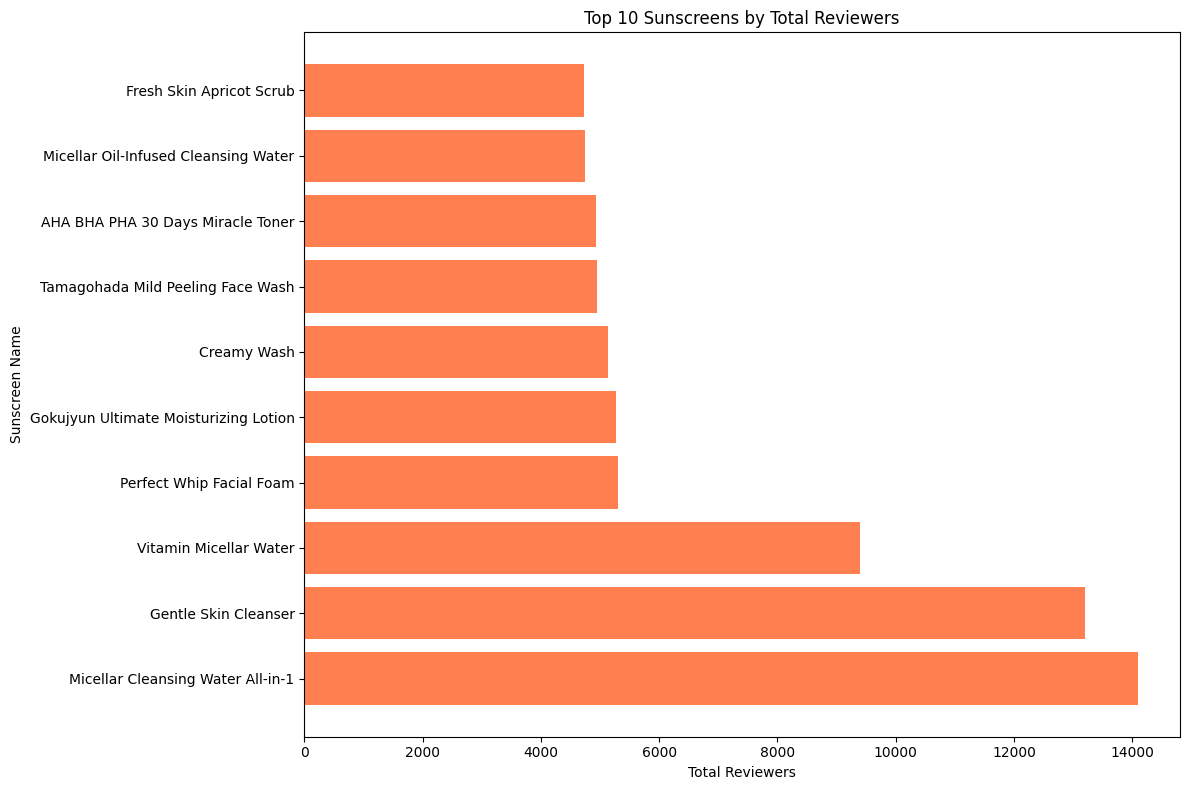

In [ ]:

# Mengambil 10 sunscreen dengan total reviewer tertinggi
top_sunscreens = df.nlargest(10, 'Total Reviewers')

plt.figure(figsize=(12, 8))
plt.barh(top_sunscreens['Name'], top_sunscreens['Total Reviewers'], color='coral')

plt.title('Top 10 Sunscreens by Total Reviewers')
plt.xlabel('Total Reviewers')
plt.ylabel('Sunscreen Name')
plt.tight_layout()
plt.show()


##Seaborn

In [ ]:
import seaborn as sns

In [ ]:
# Sort dataset by Total_Reviewers and take top 20
top_20_df = df.sort_values(by='Total Reviewers', ascending=False).head(20)


<ipython-input-26-f230e2267434>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand', y='Rating', data=top_20_df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a 

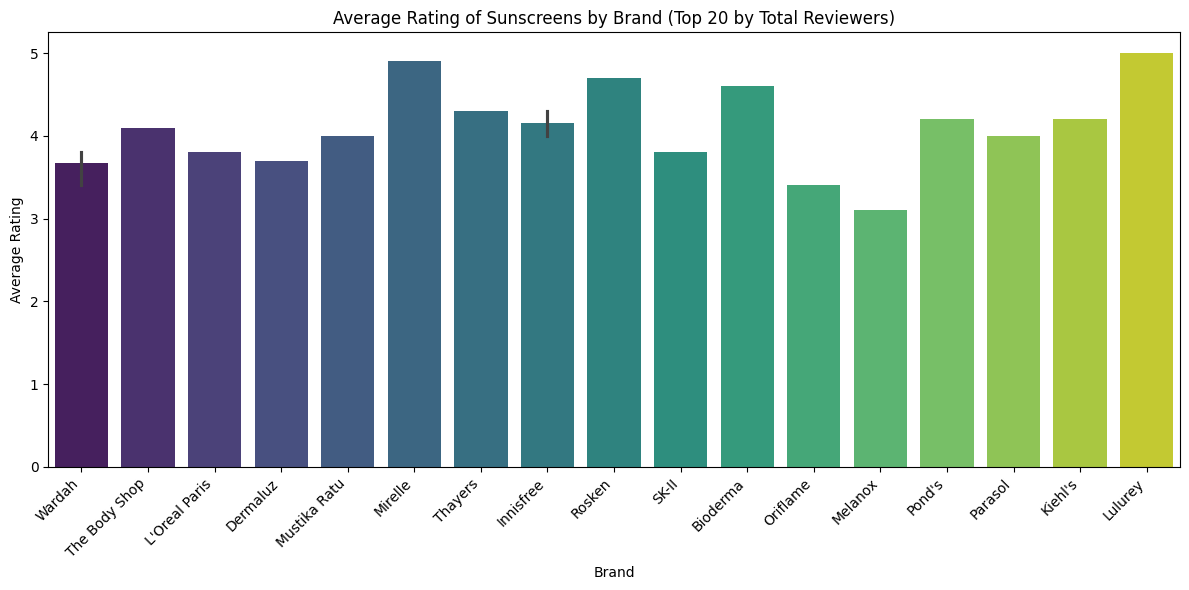

In [ ]:
#Bar Plot Rata-rata Rating per Merek (Hanya untuk 20 Data dengan Total Review Tertinggi)
plt.figure(figsize=(12, 6))
sns.barplot(x='Brand', y='Rating', data=top_20_df, palette='viridis')
plt.title('Average Rating of Sunscreens by Brand (Top 20 by Total Reviewers)')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<ipython-input-27-ba997ae123fc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Brand', data=top_20_df, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list

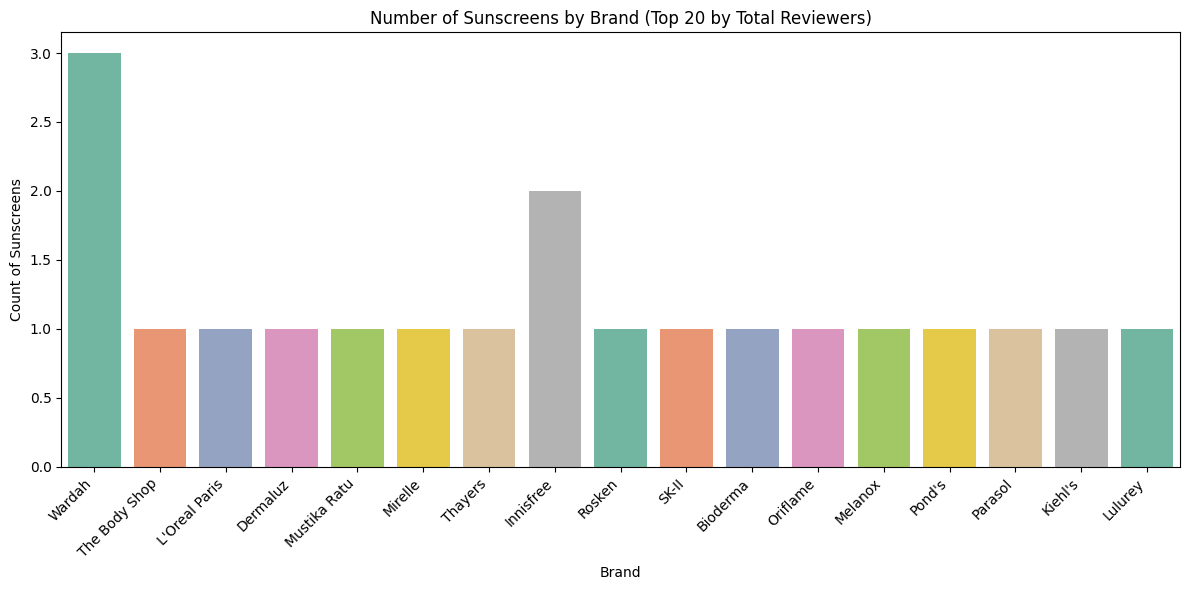

In [ ]:
#Count Plot untuk Total Reviewers per Brand (Hanya untuk 20 Data dengan Total Review Tertinggi)
plt.figure(figsize=(12, 6))
sns.countplot(x='Brand', data=top_20_df, palette='Set2')
plt.title('Number of Sunscreens by Brand (Top 20 by Total Reviewers)')
plt.xlabel('Brand')
plt.ylabel('Count of Sunscreens')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
